In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st
import pylab
import graphviz
from sklearn import tree
                

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [133]:
df=pd.read_csv("loan_data_set.csv")

In [134]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [135]:
df.shape

(614, 13)

In [136]:
df.isnull().sum()/len(df)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [138]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [139]:
df.drop(columns=['Loan_ID'],inplace=True)

In [140]:
import missingno as msno

<AxesSubplot:>

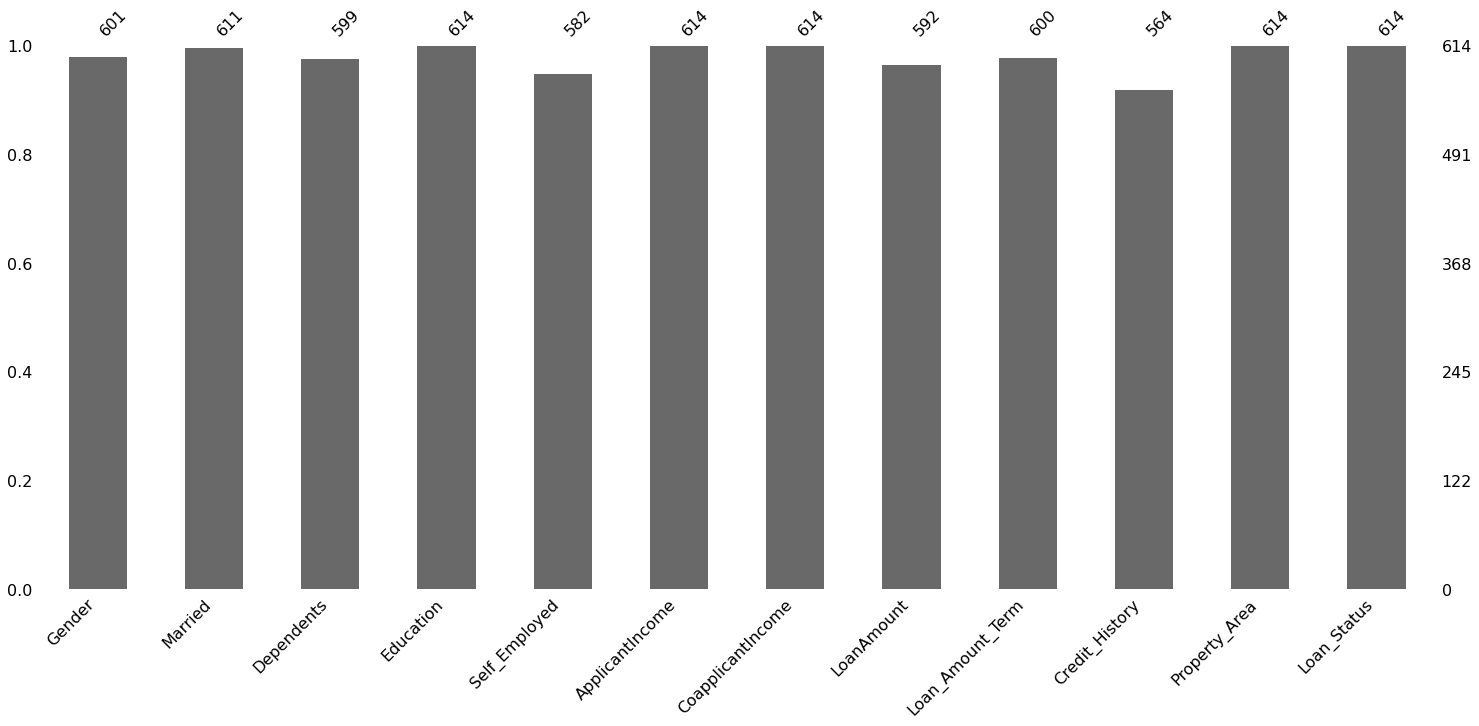

In [141]:
msno.bar(df)

In [142]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        if df[i].dtype=='O':
            df[i]=df[i].fillna(df[i].mode()[0])
        elif df[i].dtype=='int' or df[i].dtype=='float':
            df[i]=df[i].fillna(df[i].mean())
        else:
            pass

In [143]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [144]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [145]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [146]:
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})

In [147]:
df['Dependents']=df['Dependents'].replace({'0':1,'1':1,"2":2,"3+":3})

In [148]:
df1=pd.get_dummies(columns=[i for i in df.columns if df[i].dtype=="O"],drop_first=True, data=df)
df1

,Gender,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,1,5849,0.0,146.412162,360.0,1.0,0,0,0,0,1,1
1,1,1,4583,1508.0,128.000000,360.0,1.0,1,0,0,0,0,0
2,1,1,3000,0.0,66.000000,360.0,1.0,1,0,1,0,1,1
3,1,1,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,1,1
4,1,1,6000,0.0,141.000000,360.0,1.0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,1
610,1,3,4106,0.0,40.000000,180.0,1.0,1,0,0,0,0,1
611,1,1,8072,240.0,253.000000,360.0,1.0,1,0,0,0,1,1
612,1,2,7583,0.0,187.000000,360.0,1.0,1,0,0,0,1,1


segreagate x and y

In [149]:
x=df1.drop(columns=['Loan_Status_Y'])
y=df1['Loan_Status_Y']

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [151]:
Ad=AdaBoostClassifier()

In [152]:
Ad.fit(x_train,y_train)

AdaBoostClassifier()

In [153]:
y_pred=Ad.predict(x_test)

In [154]:
y_pred_train= Ad.predict(x_train)

In [155]:
accuracy_score(y_pred,y_test)

0.7479674796747967

In [156]:
accuracy_score(y_pred_train,y_train)

0.8574338085539714

In [158]:
importance=pd.DataFrame({'Features Names':x_train.columns,'Importance':Ad.feature_importances_})

In [159]:
Feature_Importance= importance.sort_values(by='Importance',ascending=False)

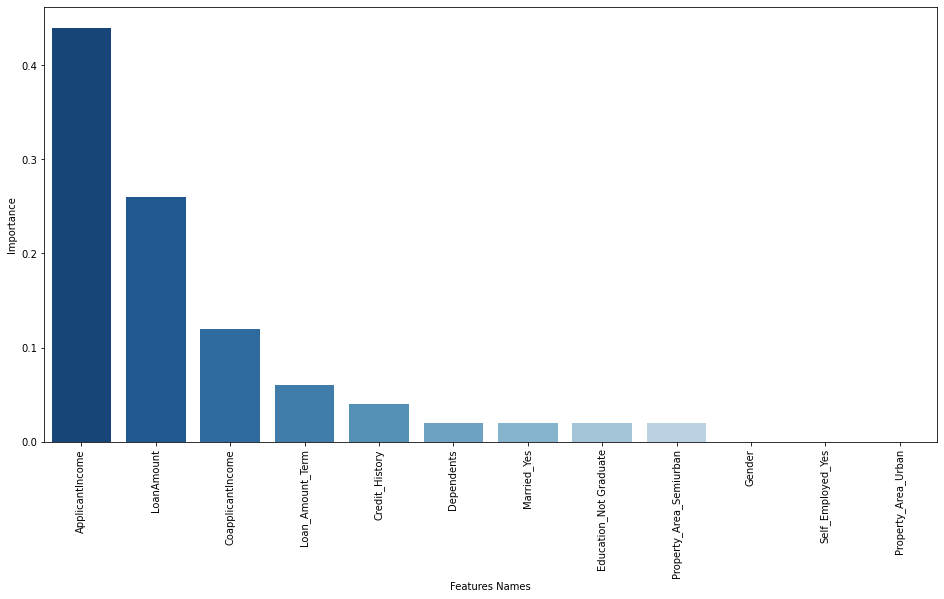

In [163]:
plt.figure(figsize=(16,8))
sns.barplot(x='Features Names',y='Importance',palette='Blues_r',data=Feature_Importance)
plt.xticks(rotation=90)
plt.show()

# HyperParameter Tunning for Adaboostclassifier

In [164]:
grid_param={
    "n_estimators":[10,50,100,500,200],
    "learning_rate":[0.0001,0.01,0.001,1.0]
}

In [166]:
grid_search=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid_param,n_jobs=-1,scoring='accuracy')

In [167]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.01, 0.001, 1.0],
                         'n_estimators': [10, 50, 100, 500, 200]},
             scoring='accuracy')

In [169]:
grid_search.best_score_

0.8165739022881879

In [171]:
best_parameter=grid_search.best_params_

In [173]:
Ada=AdaBoostClassifier(**best_parameter)

In [175]:
Ada.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10)

In [176]:
y_pred=Ada.predict(x_test)

In [177]:
y_pred_train= Ada.predict(x_train)

In [178]:
accuracy_score(y_pred,y_test)

0.7967479674796748

In [179]:
accuracy_score(y_pred_train,y_train)

0.8309572301425662